In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
auto = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Auto.csv')
print(auto.shape)
auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto  = auto.dropna()
auto['horsepower'] = auto['horsepower'].astype('int')

In [5]:
auto = auto.dropna()
auto = auto.sort_values(by = ['horsepower'],ascending = True,axis = 0)    

In [6]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel


In [7]:
def fit_degree(data,var,target,degree):
    poly = PolynomialFeatures(degree)
    poly_data = poly.fit_transform(data[var].to_frame())
    lin_model = LinearRegression(fit_intercept=False)
    lin_model.fit(poly_data,data[target])
    pred = lin_model.predict(poly_data)
    
    return pred
    

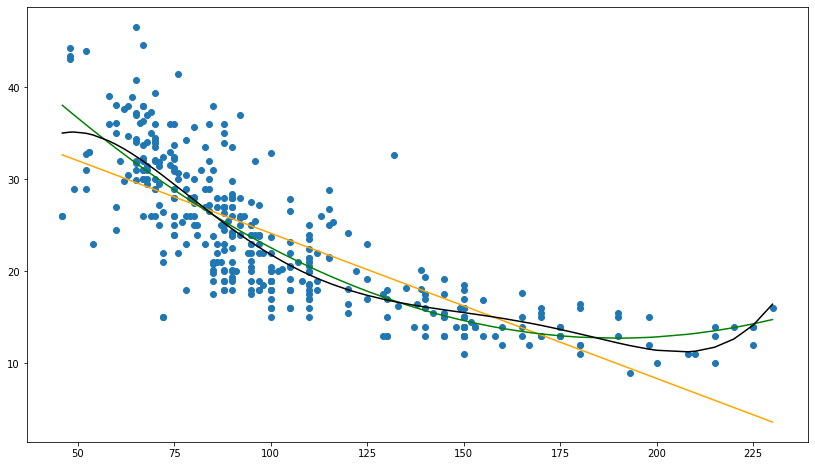

In [8]:
pred_1 = fit_degree(auto,'horsepower','mpg',1)
pred_2 = fit_degree(auto,'horsepower','mpg',2)
pred_5 = fit_degree(auto,'horsepower','mpg',5)

plt.figure(figsize = (14,8))
plt.scatter(auto['horsepower'],auto['mpg'])
plt.plot(auto['horsepower'],pred_1,color = 'orange')
plt.plot(auto['horsepower'],pred_2,color = 'green')
plt.plot(auto['horsepower'],pred_5,color = 'black')
plt.show()

In [9]:
import statsmodels.api as sm

# Poly fit with degree 2

In [10]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(auto['horsepower'].to_frame())

In [11]:
est = sm.OLS(auto['mpg'], poly_data)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.40e-99
Time:                        08:16:57   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

# linear fit

In [12]:
poly = PolynomialFeatures(1)
poly_data = poly.fit_transform(auto['horsepower'].to_frame())

In [13]:
est = sm.OLS(auto['mpg'], poly_data)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           7.03e-81
Time:                        08:16:58   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# poly fit with degree 5

In [14]:
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(auto['horsepower'].to_frame())

In [15]:
est = sm.OLS(auto['mpg'], poly_data)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           5.40e-99
Time:                        08:16:58   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.0

# residual plot

### For degree 1

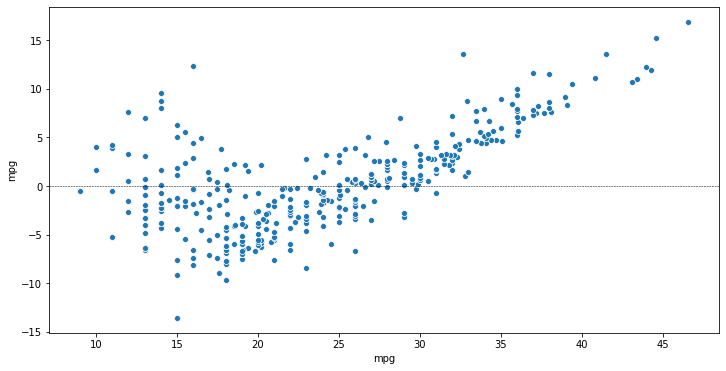

In [29]:
error_1 = auto['mpg'] - pred_1
plt.figure(figsize = (12,6))
sns.scatterplot(x = auto['mpg'],y = error_1)
plt.axhline(y = 0,linestyle = 'dashed',color = 'black',linewidth = 0.5)

### for degree 2

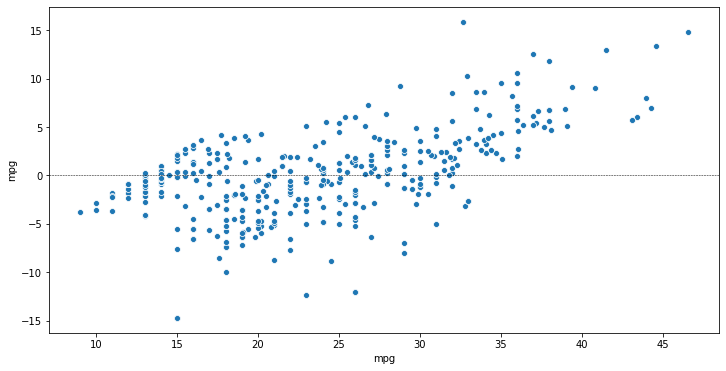

In [30]:
error_2 = auto['mpg'] - pred_2

plt.figure(figsize = (12,6))
sns.scatterplot(x = auto['mpg'],y = error_2)
plt.axhline(y = 0,linestyle = 'dashed',color = 'black',linewidth = 0.5)

In [31]:
# we can see the that the former graph has kind of U pattern, and thus it does not follow a linear relationship,
# on the other hand the latter graph has no such kind of definate pattern, and is dispersed quite well